In [ ]:
import pandas as pd
import numpy as np
import spacy

from sklearn.preprocessing import LabelEncoder

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:546: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
df = pd.read_csv('/content/snopes_phase1_clean_2018_7_3.csv')

In [ ]:
df.head()

,fact_rating_phase1,snopes_url_phase1,article_title_phase1,article_category_phase1,article_date_phase1,article_claim_phase1,article_origin_url_phase1,index_paragraph_phase1,page_is_first_citation_phase1
0,true,https://www.snopes.com/fact-check/lori-mcallen...,Did an Oregon Department of Transportation Emp...,Viral Phenomena Viral Phenomena,21 June 2018,"In June 2018, Oregon DOT employee Lori McAllen...",https://www.oregon.gov/odot/Pages/index.aspx,1,True
1,true,https://www.snopes.com/fact-check/lori-mcallen...,Did an Oregon Department of Transportation Emp...,Viral Phenomena Viral Phenomena,21 June 2018,"In June 2018, Oregon DOT employee Lori McAllen...",http://archive.is/HpML7,2,False
2,true,https://www.snopes.com/fact-check/lori-mcallen...,Did an Oregon Department of Transportation Emp...,Viral Phenomena Viral Phenomena,21 June 2018,"In June 2018, Oregon DOT employee Lori McAllen...",https://us-east-1.tchyn.io/snopes-production/u...,4,False
3,true,https://www.snopes.com/fact-check/lori-mcallen...,Did an Oregon Department of Transportation Emp...,Viral Phenomena Viral Phenomena,21 June 2018,"In June 2018, Oregon DOT employee Lori McAllen...",https://us-east-1.tchyn.io/snopes-production/u...,10,False
4,true,https://www.snopes.com/fact-check/lori-mcallen...,Did an Oregon Department of Transportation Emp...,Viral Phenomena Viral Phenomena,21 June 2018,"In June 2018, Oregon DOT employee Lori McAllen...",https://us-east-1.tchyn.io/snopes-production/u...,12,False


In [ ]:
df['fact_rating_phase1'].nunique()

12

In [ ]:
df['fact_rating_phase1'].unique()


array(['true', 'mostly true', 'mixture', 'mostly false', 'false',
       'unproven', 'outdated', 'miscaptioned', 'correct attribution',
       'misattributed', 'scam', 'legend'], dtype=object)

In [ ]:
df.iloc[0].article_category_phase1

'Viral Phenomena  Viral Phenomena'

In [ ]:
df.iloc[0].article_claim_phase1


'In June 2018, Oregon DOT employee Lori McAllen said immigrants into the United States should be shot at the border with Mexico.'

In [ ]:
print(df.columns)

Index(['fact_rating_phase1', 'snopes_url_phase1', 'article_title_phase1',
       'article_category_phase1', 'article_date_phase1',
       'article_claim_phase1', 'article_origin_url_phase1',
       'index_paragraph_phase1', 'page_is_first_citation_phase1'],
      dtype='object')


In [ ]:
df.drop(['snopes_url_phase1', 'article_title_phase1', 'article_category_phase1', 
         'article_date_phase1', 'article_origin_url_phase1', 'index_paragraph_phase1', 
         'page_is_first_citation_phase1'], inplace=True, axis=1)

In [ ]:
df.head()

,fact_rating_phase1,article_claim_phase1
0,true,"In June 2018, Oregon DOT employee Lori McAllen..."
1,true,"In June 2018, Oregon DOT employee Lori McAllen..."
2,true,"In June 2018, Oregon DOT employee Lori McAllen..."
3,true,"In June 2018, Oregon DOT employee Lori McAllen..."
4,true,"In June 2018, Oregon DOT employee Lori McAllen..."


In [ ]:
df['article_claim_phase1'].nunique()

5638

In [ ]:
df = df.drop_duplicates(subset='article_claim_phase1')

In [ ]:
df

,fact_rating_phase1,article_claim_phase1
0,true,"In June 2018, Oregon DOT employee Lori McAllen..."
6,true,The Trump administration is paying Southwest K...
20,true,"First Lady Melania Trump wore a jacket with ""I..."
37,true,Facebook posts by commercial flight attendants...
46,true,Stephen Miller a principal architect of the T...
...,...,...
37944,legend,A badly injured soldier tells his parents abou...
37945,legend,A dog's mouth is cleaner than a human's.
37946,legend,Images of the World Trade Center fire reveal t...
37950,legend,E-mail describes ruse intended to scare away l...


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
import re

# Download the NLTK resources required for preprocessing
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Define the stop words to be removed
stop_words = set(stopwords.words('english'))

# Create an instance of the WordNetLemmatizer and PorterStemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# Define a function to perform the preprocessing
def preprocess_text(text):
    # Convert everything to lowercase
    text = text.lower()

    # remove everything that is not an alphabet
    text = re.sub('[^a-zA-Z]', ' ', text)

    # Tokenize the text into words
    words = word_tokenize(text)

    # Remove stop words
    words = [word for word in words if word not in stop_words]

    # Lemmatize the words
    words = [lemmatizer.lemmatize(word) for word in words]

    # Apply stemming
    words = [stemmer.stem(word) for word in words]

    # Join the words back into a string
    text = " ".join(words)

    return text

# Apply the preprocessing function to the 'text' column of the DataFrame 'df'
df['article_claim_phase1'] = df['article_claim_phase1'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df['categorical_label'] = pd.Categorical(df['fact_rating_phase1'], categories=df['fact_rating_phase1'].unique(), ordered=False)

In [ ]:
df.tail()

,fact_rating_phase1,article_claim_phase1,categorical_label,integer_label
37944,legend,badli injur soldier tell parent lifestyl alter...,legend,2
37945,legend,dog mouth cleaner human,legend,2
37946,legend,imag world trade center fire reveal face satan,legend,2
37950,legend,e mail describ ruse intend scare away litter m...,legend,2
37953,legend,star war trade card alter depict droid c p ove...,legend,2


In [ ]:
#Checking Null Values
df.isna().sum()

fact_rating_phase1      0
article_claim_phase1    0
categorical_label       0
integer_label           0
dtype: int64

In [ ]:
# df.drop('label', axis=1, inplace=True)

In [ ]:
le = LabelEncoder()
df['integer_label'] = le.fit_transform(df['fact_rating_phase1'])

In [ ]:
df.head()


,fact_rating_phase1,article_claim_phase1,categorical_label,integer_label
0,true,june oregon dot employe lori mcallen said immi...,true,10
6,true,trump administr pay southwest key million run ...,true,10
20,true,first ladi melania trump wore jacket n realli ...,true,10
37,true,facebook post commerci flight attend describ e...,true,10
46,true,stephen miller princip architect trump adminis...,true,10


<h1>Spacy Word Embeddings<h1>

In [ ]:
spacy.cli.download("en_core_web_lg")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
word_vectors = spacy.load('en_core_web_lg')

In [ ]:
df['vector'] = df['article_claim_phase1'].apply(lambda text: word_vectors(text).vector)  

In [ ]:
df.head()

,fact_rating_phase1,article_claim_phase1,categorical_label,integer_label,vector
0,true,june oregon dot employe lori mcallen said immi...,true,10,"[-1.017713, 0.9928192, -1.784253, 1.5347661, 2..."
6,true,trump administr pay southwest key million run ...,true,10,"[-1.5835826, 1.0406727, -2.3223145, 0.865502, ..."
20,true,first ladi melania trump wore jacket n realli ...,true,10,"[-0.5228503, 2.385524, -0.78939813, -0.6045475..."
37,true,facebook post commerci flight attend describ e...,true,10,"[0.448612, 0.6458794, -1.33293, -0.14908333, 1..."
46,true,stephen miller princip architect trump adminis...,true,10,"[-1.4715058, 0.41417882, -0.6381451, 1.161293,..."


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.vector.values,
    df.integer_label,
    test_size=0.2,
    random_state=20
)

In [ ]:
X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

In [ ]:


from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaled_train_embed = scaler.fit_transform(X_train_2d)
scaled_test_embed = scaler.transform(X_test_2d)


clf = MultinomialNB()
clf.fit(scaled_train_embed, y_train)



MultinomialNB()

In [ ]:
from sklearn.metrics import classification_report
y_pred = clf.predict(scaled_test_embed)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.57      1.00      0.72       638
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        25
           5       0.00      0.00      0.00       138
           6       0.00      0.00      0.00        77
           7       0.00      0.00      0.00        22
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         5
          10       0.00      0.00      0.00       122
          11       0.00      0.00      0.00        78

    accuracy                           0.57      1128
   macro avg       0.05      0.08      0.06      1128
weighted avg       0.32      0.57      0.41      1128



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(95.72222222222221, 0.5, 'Truth')

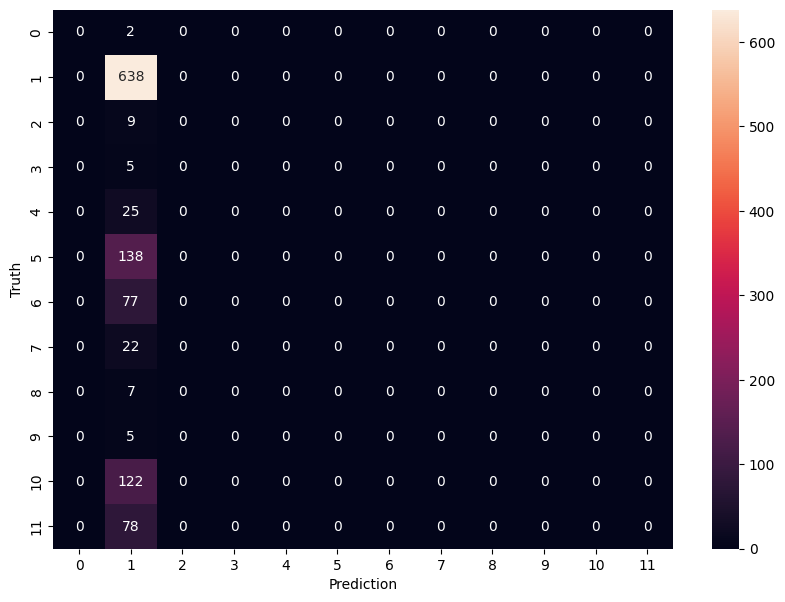

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

<h1>Gensim Word Embeddings<h1>

In [ ]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
# from gensim.models import KeyedVectors

# # Replace the path with the path where you saved the downloaded model file
# model_path = "/content/GoogleNews-vectors-negative300.bin.gz"

# # Load the model
# wv = KeyedVectors.load_word2vec_format(model_path, binary=True)


In [ ]:
def preprocess_and_vectorize(text):
    # remove stop words and lemmatize the text
    doc = word_vectors(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
        
    return wv.get_mean_vector(filtered_tokens)

In [ ]:
df['gensin_vector'] = df['article_claim_phase1'].apply(lambda text: preprocess_and_vectorize(text))

In [ ]:
df.head()

,fact_rating_phase1,article_claim_phase1,categorical_label,integer_label,vector,fasttext_input,gensin_vector
0,__label__true,june oregon dot employe lori mcallen said immi...,true,10,"[-1.017713, 0.9928192, -1.784253, 1.5347661, 2...",__label__true june oregon dot employe lori mca...,"[-0.03403843, 0.005087541, 0.00062444364, 0.03..."
6,__label__true,trump administr pay southwest key million run ...,true,10,"[-1.5835826, 1.0406727, -2.3223145, 0.865502, ...",__label__true trump administr pay southwest ke...,"[0.0075534484, -0.00755012, -0.0015898396, 0.0..."
20,__label__true,first ladi melania trump wore jacket n realli ...,true,10,"[-0.5228503, 2.385524, -0.78939813, -0.6045475...",__label__true first ladi melania trump wore ja...,"[-0.0121754715, 0.025626652, 0.0058077914, 0.0..."
37,__label__true,facebook post commerci flight attend describ e...,true,10,"[0.448612, 0.6458794, -1.33293, -0.14908333, 1...",__label__true facebook post commerci flight at...,"[-0.021185098, -0.0036598563, -0.021053592, 0...."
46,__label__true,stephen miller princip architect trump adminis...,true,10,"[-1.4715058, 0.41417882, -0.6381451, 1.161293,...",__label__true stephen miller princip architect...,"[-0.0034739787, 0.032993015, 0.016301386, 0.01..."


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df.gensin_vector.values, 
    df.integer_label, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=20,
    stratify=df.integer_label
)

In [ ]:
print("Shape of X_train before reshaping: ", X_train.shape)
print("Shape of X_test before reshaping: ", X_test.shape)


X_train_2d = np.stack(X_train)
X_test_2d =  np.stack(X_test)

print("Shape of X_train after reshaping: ", X_train_2d.shape)
print("Shape of X_test after reshaping: ", X_test_2d.shape)

Shape of X_train before reshaping:  (4510,)
Shape of X_test before reshaping:  (1128,)
Shape of X_train after reshaping:  (4510, 300)
Shape of X_test after reshaping:  (1128, 300)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# Using Random forest instead of gradient boosting to save time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

#1. creating a GradientBoosting model object
# clf = GradientBoostingClassifier()
clf = RandomForestClassifier()
#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)


#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.58      1.00      0.73       652
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        20
           5       0.00      0.00      0.00       122
           6       0.00      0.00      0.00        82
           7       0.00      0.00      0.00        29
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00       116
          11       0.00      0.00      0.00        82

    accuracy                           0.58      1128
   macro avg       0.05      0.08      0.06      1128
weighted avg       0.33      0.58      0.42      1128



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(95.72222222222221, 0.5, 'Truth')

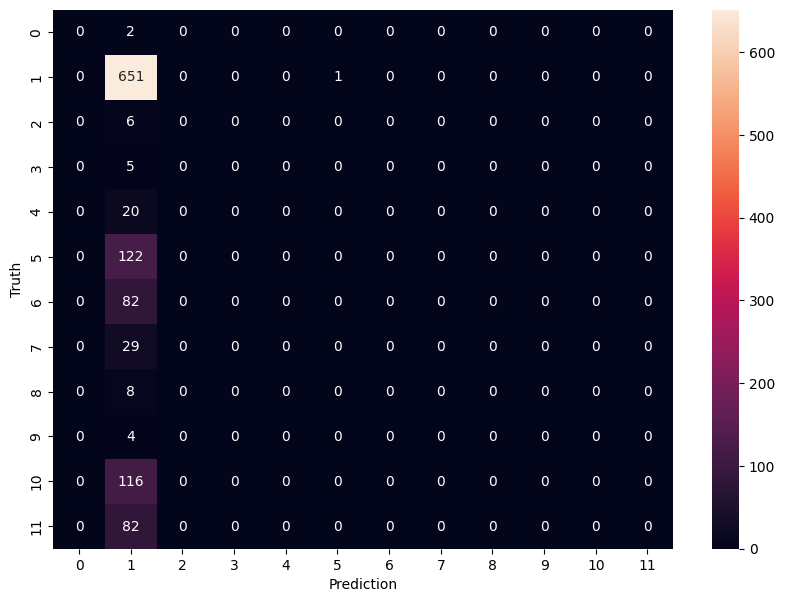

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

<h1>fasttext<h1>

In [ ]:
import re

def preprocess(text):
    text = re.sub(r'[^\w\s\']',' ', text)
    text = re.sub(' +', ' ', text)
    return text.strip().lower() 

In [ ]:
df.head()

,fact_rating_phase1,article_claim_phase1,categorical_label,integer_label,vector
0,true,june oregon dot employe lori mcallen said immi...,true,10,"[-1.017713, 0.9928192, -1.784253, 1.5347661, 2..."
6,true,trump administr pay southwest key million run ...,true,10,"[-1.5835826, 1.0406727, -2.3223145, 0.865502, ..."
20,true,first ladi melania trump wore jacket n realli ...,true,10,"[-0.5228503, 2.385524, -0.78939813, -0.6045475..."
37,true,facebook post commerci flight attend describ e...,true,10,"[0.448612, 0.6458794, -1.33293, -0.14908333, 1..."
46,true,stephen miller princip architect trump adminis...,true,10,"[-1.4715058, 0.41417882, -0.6381451, 1.161293,..."


In [ ]:
df['fact_rating_phase1'] = '__label__' + df['fact_rating_phase1']
df['fasttext_input'] = df['fact_rating_phase1'] + ' ' + df['article_claim_phase1'] 

In [ ]:
df.head()

,fact_rating_phase1,article_claim_phase1,categorical_label,integer_label,vector,fasttext_input
0,__label__true,june oregon dot employe lori mcallen said immi...,true,10,"[-1.017713, 0.9928192, -1.784253, 1.5347661, 2...",__label__true june oregon dot employe lori mca...
6,__label__true,trump administr pay southwest key million run ...,true,10,"[-1.5835826, 1.0406727, -2.3223145, 0.865502, ...",__label__true trump administr pay southwest ke...
20,__label__true,first ladi melania trump wore jacket n realli ...,true,10,"[-0.5228503, 2.385524, -0.78939813, -0.6045475...",__label__true first ladi melania trump wore ja...
37,__label__true,facebook post commerci flight attend describ e...,true,10,"[0.448612, 0.6458794, -1.33293, -0.14908333, 1...",__label__true facebook post commerci flight at...
46,__label__true,stephen miller princip architect trump adminis...,true,10,"[-1.4715058, 0.41417882, -0.6381451, 1.161293,...",__label__true stephen miller princip architect...


In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)



In [ ]:
train.shape, test.shape

((4510, 6), (1128, 6))

In [ ]:
train.to_csv("fasttext.train", columns=["fasttext_input"], index=False, header=False)
test.to_csv("fasttext.test", columns=["fasttext_input"], index=False, header=False)


In [ ]:
# !git clone https://github.com/facebookresearch/fastText.git
# %cd fastText
# !make
# !cp fasttext ../
# %cd ..

In [ ]:
!pip install fasttext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 KB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.10.4-py3-none-any.whl (222 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp39-cp39-linux_x86_64.whl size=4395627 sha256=749a0a342a66ddc6d26b0bc0d529e03091821ade887a920b58f2d0533f8a81f2
  Stored in directory: /root/.cache/pip/wheels/64/57/bc/1741406019061d5664914b070bd3e71f6244648732bc96109e
Successfully built fasttext


In [ ]:
import fasttext

model = fasttext.train_supervised(input="fasttext.train")
model.test("fasttext.test")

(1128, 0.6666666666666666, 0.6666666666666666)

In [ ]:
model.predict("murder on street")

(('__label__false',), array([0.99141502]))